In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC




In [13]:
df = pd.read_csv("C:\\Users\\Prakash Royal\\Downloads\\Synthetic_Census_Income_Dataset.csv", header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
              'hours_per_week', 'native_country', 'income']
df = df.replace(' ?', np.nan).dropna()


In [14]:
for col in df.select_dtypes(include='object').columns:
    if col != 'income':
        df[col] = LabelEncoder().fit_transform(df[col])
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


In [15]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(kernel='linear')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    misclassification = (y_test != y_pred).sum() / len(y_test) * 100
    print(f"Misclassification %: {misclassification:.2f}")



Decision Tree
Accuracy: 0.572139303482587
Confusion Matrix:
 [[101  53]
 [ 33  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       154
           1       0.21      0.30      0.25        47

    accuracy                           0.57       201
   macro avg       0.48      0.48      0.47       201
weighted avg       0.63      0.57      0.59       201

Misclassification %: 42.79

Random Forest
Accuracy: 0.7512437810945274
Confusion Matrix:
 [[151   3]
 [ 47   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86       154
           1       0.00      0.00      0.00        47

    accuracy                           0.75       201
   macro avg       0.38      0.49      0.43       201
weighted avg       0.58      0.75      0.66       201

Misclassification %: 24.88

Logistic Regression
Accuracy: 0.7661691542288557
Confusion Matrix:
 [[15

C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi


SVC
Accuracy: 0.7661691542288557
Confusion Matrix:
 [[154   0]
 [ 47   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       154
           1       0.00      0.00      0.00        47

    accuracy                           0.77       201
   macro avg       0.38      0.50      0.43       201
weighted avg       0.59      0.77      0.66       201

Misclassification %: 23.38


C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

C:\Users\Prakash Royal\AppData\Local\Temp\ipykernel_19404\2196323909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_synthetic, x='income', palette='Set2')


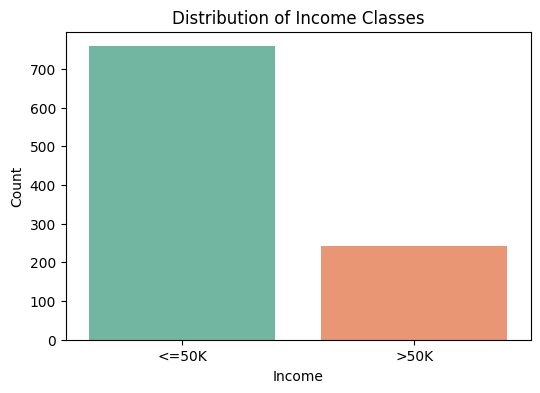

In [18]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_samples = 1000

ages = np.random.randint(18, 70, n_samples)
workclasses = np.random.choice(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 
                                'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'], n_samples)
fnlwgt = np.random.randint(20000, 1000000, n_samples)
educations = np.random.choice(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 
                               'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Prof-school'], n_samples)
education_num = np.random.randint(1, 16, n_samples)
marital_statuses = np.random.choice(['Married-civ-spouse', 'Divorced', 'Never-married', 
                                     'Separated', 'Widowed', 'Married-spouse-absent'], n_samples)
occupations = np.random.choice(['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 
                                'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 
                                'Machine-op-inspct', 'Adm-clerical'], n_samples)
relationships = np.random.choice(['Wife', 'Own-child', 'Husband', 'Not-in-family', 
                                  'Other-relative', 'Unmarried'], n_samples)
races = np.random.choice(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 
                          'Other'], n_samples)
sexes = np.random.choice(['Male', 'Female'], n_samples)
capital_gain = np.random.choice([0, 5000, 10000, 15000, 20000, 25000], n_samples)
capital_loss = np.random.choice([0, 1000, 2000, 3000, 4000], n_samples)
hours_per_week = np.random.randint(1, 100, n_samples)
native_countries = np.random.choice(['United-States', 'Mexico', 'Philippines', 'Germany', 
                                     'Canada', 'India', 'England', 'China'], n_samples)
incomes = np.random.choice(['<=50K', '>50K'], n_samples, p=[0.75, 0.25])

df_synthetic = pd.DataFrame({
    'age': ages,
    'workclass': workclasses,
    'fnlwgt': fnlwgt,
    'education': educations,
    'education_num': education_num,
    'marital_status': marital_statuses,
    'occupation': occupations,
    'relationship': relationships,
    'race': races,
    'sex': sexes,
    'capital_gain': capital_gain,
    'capital_loss': capital_loss,
    'hours_per_week': hours_per_week,
    'native_country': native_countries,
    'income': incomes
})


C:\Users\Prakash Royal\AppData\Local\Temp\ipykernel_19404\2380411060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_synthetic, x='income', palette='Set2')


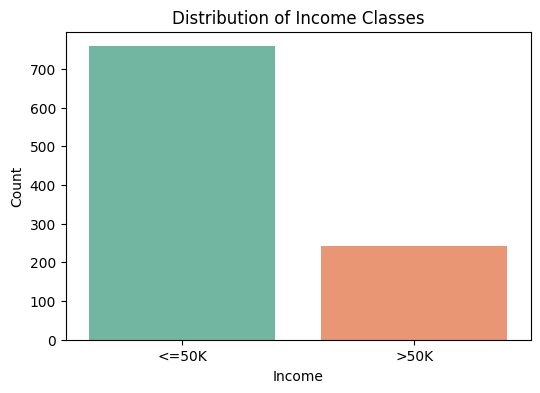

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_synthetic, x='income', palette='Set2')
plt.title('Distribution of Income Classes')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

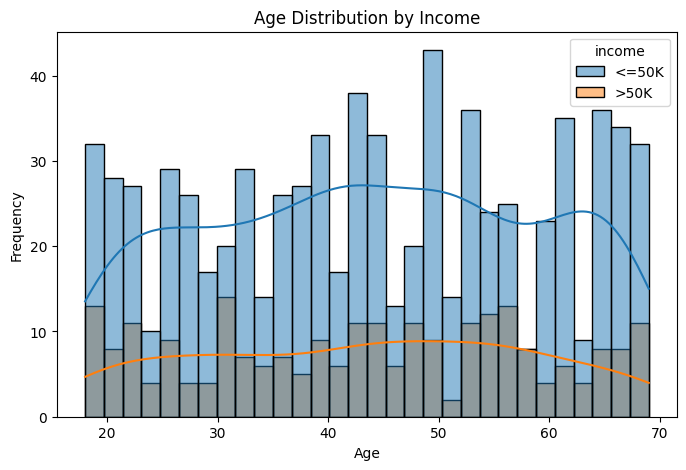

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_synthetic, x='age', hue='income', kde=True, bins=30)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\Prakash Royal\AppData\Local\Temp\ipykernel_19404\3179903117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_synthetic, x='income', y='hours_per_week', palette='Set3')


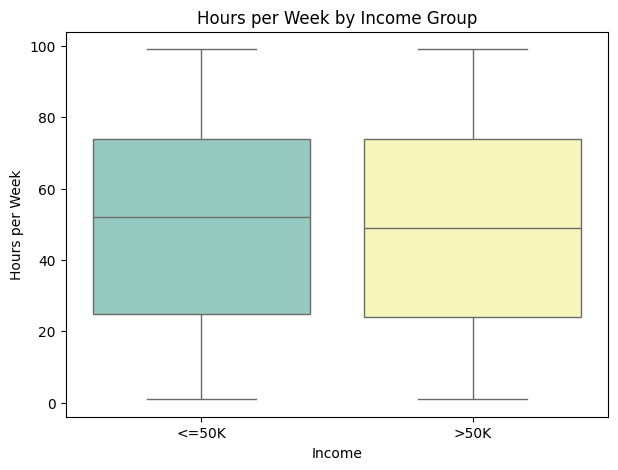

In [22]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_synthetic, x='income', y='hours_per_week', palette='Set3')
plt.title('Hours per Week by Income Group')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()


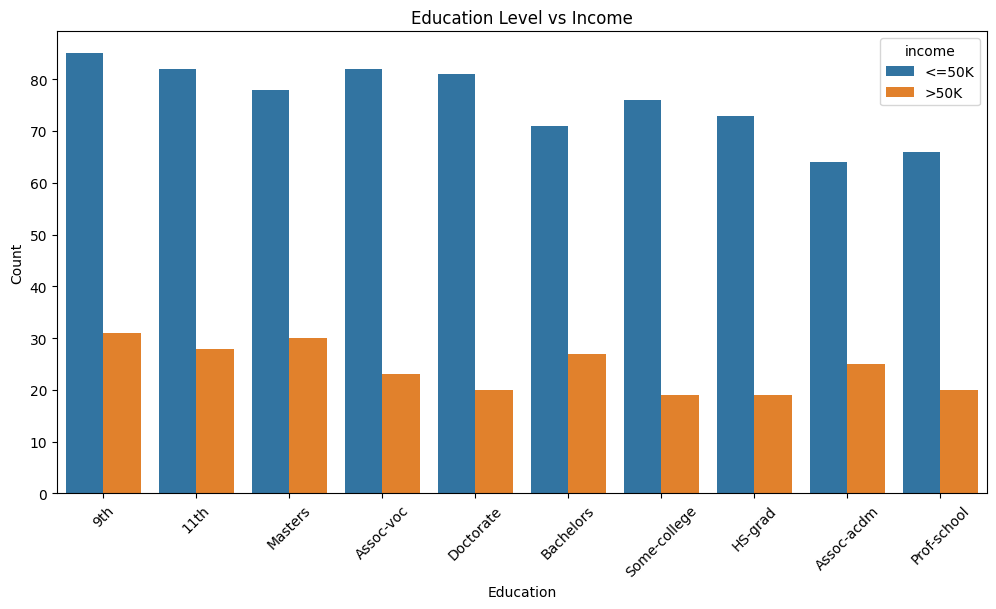

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_synthetic, x='education', hue='income', order=df_synthetic['education'].value_counts().index)
plt.title('Education Level vs Income')
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


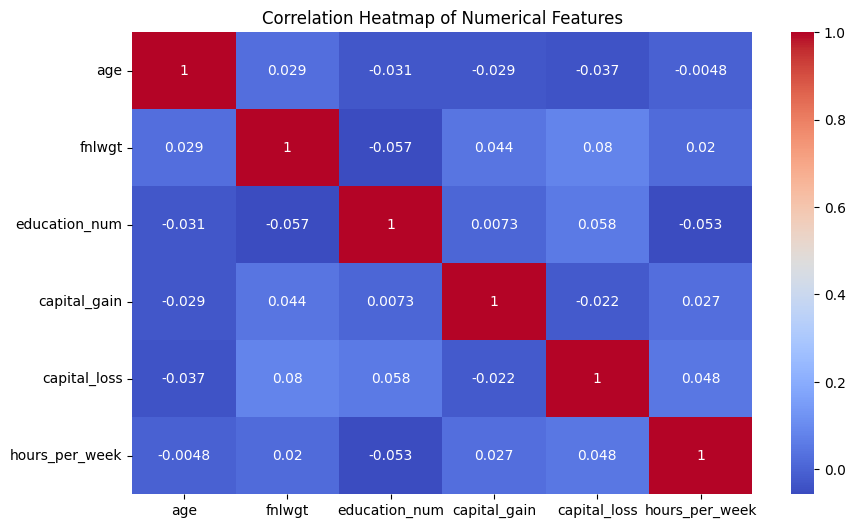

In [24]:
plt.figure(figsize=(10, 6))
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
sns.heatmap(df_synthetic[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [25]:
# Import additional metric tools if not already imported
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(kernel='linear')
}

# List to store results
results = []

# Train, evaluate, and store results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    misclassification = (y_test != y_pred).mean() * 100
    
    # Print details (optional)
    print(f"\n{name}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Misclassification %: {misclassification:.2f}")
    
    # Save to results list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Misclassification %': misclassification
    })

# Create summary table
df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)





Decision Tree
Accuracy: 0.572139303482587
Confusion Matrix:
 [[104  50]
 [ 36  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71       154
           1       0.18      0.23      0.20        47

    accuracy                           0.57       201
   macro avg       0.46      0.45      0.46       201
weighted avg       0.61      0.57      0.59       201

Misclassification %: 42.79

Random Forest
Accuracy: 0.7611940298507462
Confusion Matrix:
 [[152   2]
 [ 46   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.86       154
           1       0.33      0.02      0.04        47

    accuracy                           0.76       201
   macro avg       0.55      0.50      0.45       201
weighted avg       0.67      0.76      0.67       201

Misclassification %: 23.88

Logistic Regression
Accuracy: 0.7661691542288557
Confusion Matrix:
 [[15

C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi


SVC
Accuracy: 0.7661691542288557
Confusion Matrix:
 [[154   0]
 [ 47   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       154
           1       0.00      0.00      0.00        47

    accuracy                           0.77       201
   macro avg       0.38      0.50      0.43       201
weighted avg       0.59      0.77      0.66       201

Misclassification %: 23.38

Model Comparison Table:

              Model  Accuracy  Precision   Recall  F1 Score  Misclassification %
Logistic Regression  0.766169   0.000000 0.000000  0.000000            23.383085
                SVC  0.766169   0.000000 0.000000  0.000000            23.383085
      Random Forest  0.761194   0.333333 0.021277  0.040000            23.880597
                KNN  0.711443   0.238095 0.106383  0.147059            28.855721
      Decision Tree  0.572139   0.180328 0.234043  0.203704            42.786070


C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Royal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [26]:
# Display as a table
print("\nModel Comparison Table:\n")
print(df_results.to_string(index=False))


Model Comparison Table:

              Model  Accuracy  Precision   Recall  F1 Score  Misclassification %
Logistic Regression  0.766169   0.000000 0.000000  0.000000            23.383085
                SVC  0.766169   0.000000 0.000000  0.000000            23.383085
      Random Forest  0.761194   0.333333 0.021277  0.040000            23.880597
                KNN  0.711443   0.238095 0.106383  0.147059            28.855721
      Decision Tree  0.572139   0.180328 0.234043  0.203704            42.786070
